In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam WHERE vam.grade = %s AND vam.year = %s ORDER BY vam.school_id;"

data2012 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2012'], parse_dates=None, columns=None, chunksize=None)

data2013 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2013'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

In [4]:
data2012[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract Schools,4th Grade,2012,34.7,0.8,-0.1 to 1.7,79,Yellow,34.7,0.0,-0.8 to 0.7,48,Yellow
1,"LOCKE, A CHTR",400011,Charter/Contract Schools,4th Grade,2012,39.0,0.3,-0.6 to 1.1,60,Yellow,39.0,0.2,-0.5 to 1,62,Yellow
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,4th Grade,2012,46.1,-1.3,-2.1 to -0.5,9,Red,46.1,0.3,-0.3 to 1,64,Yellow
3,CATALYST CHTR - HOWLAND,400020,Charter/Contract Schools,4th Grade,2012,52.4,-1.1,-1.9 to -0.3,12,Red,52.4,-0.7,-1.3 to -0.1,22,Red


In [5]:
data2013[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract,4th Grade,2013,47,-0.8,-1.7 to 0,17,Yellow,47,-1.1,-1.7 to -0.4,15,Red
1,"LOCKE, A CHTR",400011,Charter/Contract,4th Grade,2013,59,-0.5,-1.3 to 0.3,28,Yellow,59,0.4,-0.2 to 1,68,Yellow
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract,4th Grade,2013,47,-0.2,-1.1 to 0.6,38,Yellow,47,-0.3,-1 to 0.4,40,Yellow
3,CATALYST CHTR - HOWLAND,400020,Charter/Contract,4th Grade,2013,50,0.5,-0.4 to 1.4,72,Yellow,50,0.5,-0.1 to 1.2,73,Yellow


In [6]:
left = data2012
right = data2013
result = pd.merge(left, right, on='school_id')
result.shape

(439, 29)

In [7]:
result[:4]

,school_name_x,school_id,network_x,grade_x,year_x,reading_studentsnumber_x,reading_vam_x,reading_confidence_x,reading_percentile_x,reading_color_x,math_studentsnumber_x,math_vam_x,math_confidence_x,math_percentile_x,math_color_x,school_name_y,network_y,grade_y,year_y,reading_studentsnumber_y,reading_vam_y,reading_confidence_y,reading_percentile_y,reading_color_y,math_studentsnumber_y,math_vam_y,math_confidence_y,math_percentile_y,math_color_y
0,GLOBAL CITIZENSHIP CHTR,400009,Charter/Contract Schools,4th Grade,2012,34.7,0.8,-0.1 to 1.7,79,Yellow,34.7,0.0,-0.8 to 0.7,48,Yellow,GLOBAL CITIZENSHIP CHTR,Charter/Contract,4th Grade,2013,47,-0.8,-1.7 to 0,17,Yellow,47,-1.1,-1.7 to -0.4,15,Red
1,"LOCKE, A CHTR",400011,Charter/Contract Schools,4th Grade,2012,39.0,0.3,-0.6 to 1.1,60,Yellow,39.0,0.2,-0.5 to 1,62,Yellow,"LOCKE, A CHTR",Charter/Contract,4th Grade,2013,59,-0.5,-1.3 to 0.3,28,Yellow,59,0.4,-0.2 to 1,68,Yellow
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract Schools,4th Grade,2012,46.1,-1.3,-2.1 to -0.5,9,Red,46.1,0.3,-0.3 to 1,64,Yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,Charter/Contract,4th Grade,2013,47,-0.2,-1.1 to 0.6,38,Yellow,47,-0.3,-1 to 0.4,40,Yellow
3,CATALYST CHTR - HOWLAND,400020,Charter/Contract Schools,4th Grade,2012,52.4,-1.1,-1.9 to -0.3,12,Red,52.4,-0.7,-1.3 to -0.1,22,Red,CATALYST CHTR - HOWLAND,Charter/Contract,4th Grade,2013,50,0.5,-0.4 to 1.4,72,Yellow,50,0.5,-0.1 to 1.2,73,Yellow


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     16.62
Date:                Mon, 17 Aug 2015   Prob (F-statistic):           5.42e-05
Time:                        16:10:35   Log-Likelihood:                -581.70
No. Observations:                 439   AIC:                             1167.
Df Residuals:                     437   BIC:                             1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0269      0.044     -0.618      0.537        -0.113     0.059
x              0.1811      0.044      4.077      0.000         0.094     0.268
==============================================================================
Omnibus:                       38.407   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.346
Skew:                          -0.228   Prob(JB):                     3.05e-34
Kurtosis:                       5.869   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

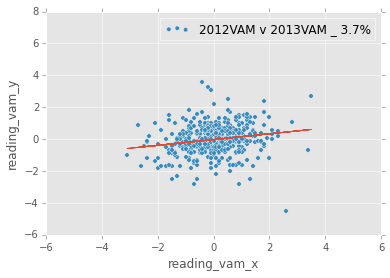

In [8]:
# different way, assign x and y
x = result['reading_vam_x']
y = result['reading_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam_x', y='reading_vam_y',label="2012VAM v 2013VAM _ 3.7%")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     28.82
Date:                Mon, 17 Aug 2015   Prob (F-statistic):           1.29e-07
Time:                        16:10:59   Log-Likelihood:                -597.76
No. Observations:                 439   AIC:                             1200.
Df Residuals:                     437   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0234      0.045     -0.517      0.606        -0.112     0.066
x              0.2400      0.045      5.369      0.000         0.152     0.328
==============================================================================
Omnibus:                       17.399   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.667
Skew:                          -0.089   Prob(JB):                     1.48e-09
Kurtosis:                       4.480   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

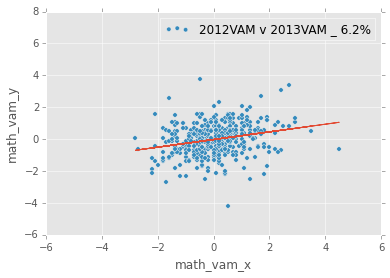

In [9]:
# different way, assign x and y
x = result['math_vam_x']
y = result['math_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam_x', y='math_vam_y',label="2012VAM v 2013VAM _ 6.2%")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()